In [1]:
# import necessary libraries
import pandas as pd  
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix  
from sklearn.metrics import roc_curve, roc_auc_score  
import matplotlib.pyplot as plt  

In [2]:
# load and prepare the dataset into a pandas DataFrame
df = pd.read_csv('crash.csv', index_col='PassengerId')
df.dropna(inplace=True)

In [3]:
# define the independent (feature) variables
X = df.drop(columns=['Survived']) 

# define the dependent (target) variable
y = df['Survived']

# split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [4]:
# fit a Logistic Regression model with the training set
model = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)

# print the summary statistics of the model
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                   14
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Feb 2025   Pseudo R-squ.:                  0.4980
Time:                        17:55:55   Log-Likelihood:                -4.8710
converged:                       True   LL-Null:                       -9.7041
Covariance Type:            nonrobust   LLR p-value:                  0.007962
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6814      4.755      1.405      0.160      -2.637      16.000
Age            0.1225      0.099      1.243      0.214      -0.071       0.316
Speed         -0.1535      0.091     -1.694      0.0

In [5]:
# make predictions with the model
predictions = model.predict(sm.add_constant(X_test))

# convert probability to binary outcomes
bin_preds = [1 if x >= 0.5 else 0 for x in predictions]

# calculate and print the accuracy score
accuracy = accuracy_score(y_test, bin_preds)
print('Accuracy Score:', accuracy)

# calculate and print the confusion matrix
conf_mtx = confusion_matrix(y_test, bin_preds)
print('Confusion Matrix:\n', conf_mtx)

Accuracy Score: 0.8333333333333334
Confusion Matrix:
 [[2 1]
 [0 3]]


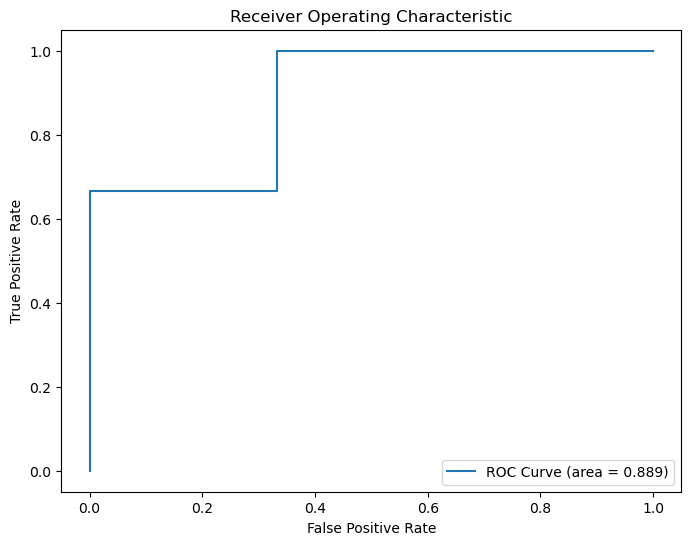

In [6]:
# calculate and plot the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# plot the ROC curve
plt.figure(figsize=(8, 6))  
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.3f})') 
plt.title('Receiver Operating Characteristic')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.legend(loc="lower right")  
plt.show()  

In [7]:
# Results:
#
# An AUC score of 0.889 shows that the logistic regression model has a good 
# ability to identify between passengers who survived and those who did not
# using the features of 'Age' and 'Speed'. With this score, it means there 
# is an 88.9% chance that the model is correctly predicting. 88.9% is not the 
# best for a model, but is over 50% meaning it is working and can differentiate 
# and decide on predictions better than purely guessing. However, due to the 
# very small dataset, each rerun of this model gives varying AUC scores betw